In [1]:
import sys
sys.path.append('../')

In [2]:
import cv2 as cv
import torch
import numpy as np
from sort.sort import Sort
import time
import matplotlib.pyplot as plt

In [3]:
from streetstudy.data import virat
from streetstudy.common import display
from streetstudy.common import evaluation
from streetstudy.common import postprocess
from streetstudy.common import utils
from streetstudy.model import yolo

In [4]:
video_path = "/home/sardarchitect/datasets/virat/videos/VIRAT_S_010204_03_000606_000632.mp4"

In [5]:
tick = time.time()

video_dict = utils.get_video_metadata(video_path)
model = yolo.YoloModel(conf=0.25)
frame_iterator = iter(utils.frame_generator(path=video_dict['path']))

for frame_number in range(video_dict['length']):
    frame = next(frame_iterator)
    model.predict(frame, frame_number)
        
tock = time.time()
print(f"{tock - tick:.4f} seconds")

Using cache found in /home/sardarchitect/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-6-3 Python-3.11.3 torch-2.0.1 CUDA:0 (NVIDIA GeForce GTX 1650, 4096MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


10.4343 seconds


In [6]:
preds = model.predictions
print(preds)

[[          0      308.43      233.26      331.96      287.83           5]
 [          0       152.1      252.21       173.8      305.17           4]
 [          0      229.26      253.07      249.05      296.46           3]
 ...
 [        399      107.71      277.75      129.19      320.29          28]
 [        399      273.98      234.95      292.69      290.52          27]
 [        399      370.27      251.05      386.37      292.47          20]]


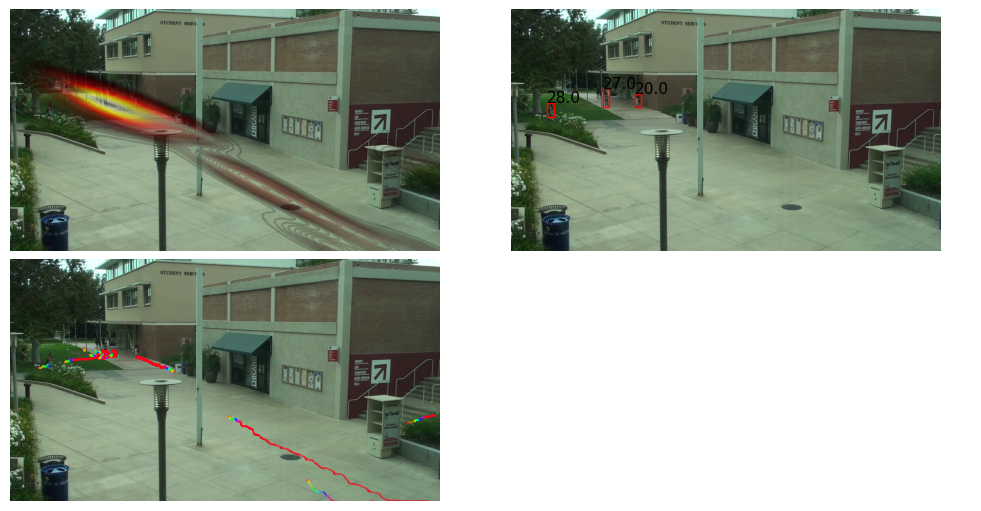

In [19]:
%matplotlib inline

def plot_analysis(video_width, video_height, preds, frame, frame_number):
    fig, axs = plt.subplots(2,2, layout="constrained", figsize=(10,5))

    for row in range(2):
        for col in range(2):
            axs[row, col].set(xlim=(0, video_width), ylim=(video_height, 0))    
            axs[row, col].set_axis_off()
            axs[row, col].set_facecolor("b")

    postprocess.heatmap(axs[0,0], preds, frame_number)
    postprocess.bounding_boxes(axs[0,1], preds, frame_number)
    postprocess.directional_arrows(axs[1,0], preds, frame_number)

    axs[0,0].imshow(cv.cvtColor(frame, cv.COLOR_BGR2RGB))
    axs[0,1].imshow(cv.cvtColor(frame, cv.COLOR_BGR2RGB))
    axs[1,0].imshow(cv.cvtColor(frame, cv.COLOR_BGR2RGB))
    
    fig.show()

plot_analysis(video_dict['width'], video_dict['height'], preds, frame, frame_number)

In [42]:
unique_objs = np.unique(preds[:,5])

for obj in unique_objs:
    pred = preds[preds[:, 5] == obj]
    
    pred_next = pred[1:]
    pred = pred[:-1]
    
    delta_x = np.abs(pred_next[:, 1] - pred[:, 1])**2
    delta_y = np.abs(pred_next[:, 2] - pred[:, 2])**2
    euclidean_dist = np.sqrt(delta_x + delta_y)
    
    print(len(euclidean_dist))
    print(min(euclidean_dist))
    print(max(euclidean_dist))
    print(np.mean(euclidean_dist))
    
    break

213
0.3078498282850654
15.22288492200889
3.504617859428566
